In [35]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Load the netCDF file
year = '2019'
dataset = xr.open_dataset('data/wettasmin_W5E5v2.0_'+year+'.nc')
var = 'wet_temperature'
# Define the temperature threshold
threshold = 273.15 - 15

# Set the window size
window_size = 90

dataset

<xarray.Dataset>
Dimensions:          (lon: 720, lat: 360, time: 365)
Coordinates:
  * lon              (lon) float64 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
  * lat              (lat) float64 89.75 89.25 88.75 ... -88.75 -89.25 -89.75
  * time             (time) datetime64[ns] 2019-01-01 2019-01-02 ... 2019-12-31
Data variables:
    wet_temperature  (time, lat, lon) float32 ...

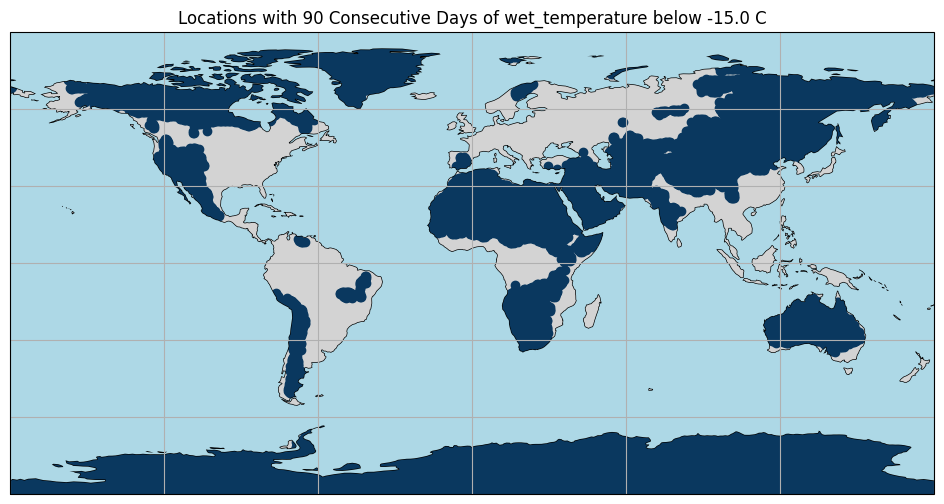

In [36]:
# Extract the necessary variables
lat = dataset['lat']
lon = dataset['lon']
temperature = dataset[var]


# Filter the dataset to the year 2001
year_dataset = dataset.sel(time=year)[var]

# Create a mask indicating if the temperature is below the threshold
mask = year_dataset < threshold

# Count the number of consecutive days below the threshold
consecutive_days = np.zeros_like(mask, dtype=int)
consecutive_days[0] = mask[0].astype(int)

for i in range(1, len(mask)):
    consecutive_days[i] = mask[i].astype(int) * (consecutive_days[i-1] + 1)

# Find the maximum consecutive days for each latitude and longitude
max_consecutive_days = np.max(consecutive_days, axis=0)

# Reshape the max_consecutive_days array based on latitude and longitude dimensions
reshaped_max_consecutive_days = max_consecutive_days.reshape(len(lat), len(lon))

# Find the latitude and longitude where the maximum consecutive days are greater than the window size
indices = np.where(reshaped_max_consecutive_days > window_size)
latitudes = lat[indices[0]]
longitudes = lon[indices[1]]

# Plot the map
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add land and ocean background
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Add map features
ax.coastlines()
ax.gridlines()

# Plot the selected locations
ax.scatter(longitudes, latitudes, color='#0a385f', marker='o', transform=ccrs.PlateCarree(), zorder=1)

# Add land and ocean background
ax.add_feature(cfeature.OCEAN, facecolor='lightblue',zorder=2)

# Set the plot extent to cover the entire world
ax.set_global()

# Set plot title and labels
ax.set_title('Locations with {} Consecutive Days of {} below {} C'.format(window_size, var, threshold-273.15))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

In [25]:
import xarray as xr
import numpy as np
import pandas as pd

# Define the wet bulb temperature calculation function
def calculate_Tw(T, RH):
    term1 = T * np.arctan(0.151977 * np.sqrt(RH + 8.313659))
    term2 = np.arctan(T + RH)
    term3 = np.arctan(RH - 1.676331)
    term4 = 0.00391838 * np.power(RH, 1.5) * np.arctan(0.023101 * RH)

    Tw = term1 + term2 - term3 + term4 - 4.686035
    return Tw

df = pd.read_csv('data/guttannen22_aws.csv')

# Extract the temperature and humidity data variables for the year 2001
temperature = df['temp']
humidity = df['RH']


# Apply the wet bulb temperature calculation to the temperature and humidity data variables
df['wet_temperature'] = calculate_Tw(temperature, humidity)


                  time   temp      RH   wind  SW_global  ppt   press    LW_in  \
0  2021-12-03 12:00:00 -7.720  93.405  0.555     22.610  0.0  89.455  299.180   
1  2021-12-03 13:00:00 -9.330  93.730  0.455     16.210  0.0  89.335  277.250   
2  2021-12-03 14:00:00 -9.110  94.710  0.410     25.535  0.0  89.430  275.875   
3  2021-12-03 15:00:00 -7.505  95.290  0.445     24.565  0.0  89.410  284.445   
4  2021-12-03 16:00:00 -5.940  96.065  0.600      8.440  0.0  89.435  289.875   

   snow_h  T_bulk_meas    T_G  
0  45.825       -2.478  2.980  
1  40.805       -0.877  2.880  
2  45.210       -1.247  2.550  
3  44.570       -2.392  2.295  
4  43.920       -0.267  2.055  
                  time   temp      RH   wind  SW_global  ppt   press    LW_in  \
0  2021-12-03 12:00:00 -7.720  93.405  0.555     22.610  0.0  89.455  299.180   
1  2021-12-03 13:00:00 -9.330  93.730  0.455     16.210  0.0  89.335  277.250   
2  2021-12-03 14:00:00 -9.110  94.710  0.410     25.535  0.0  89.430  275.875 

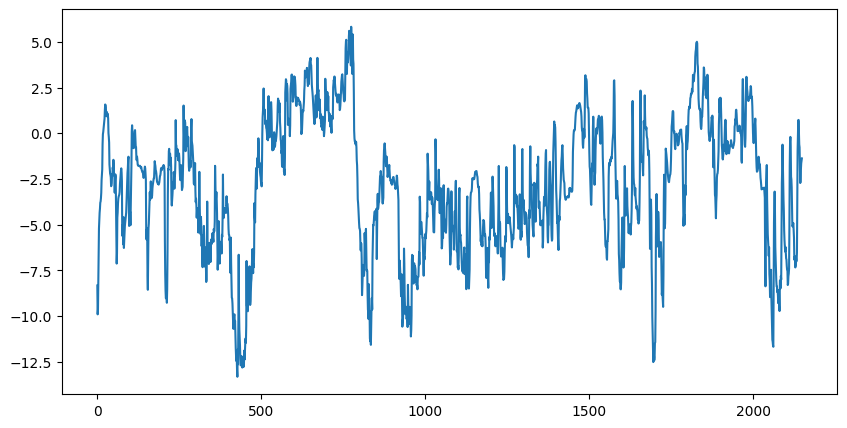

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5)) # set the size of the figure
plt.plot(df.wet_temperature) # scatter plot of the data

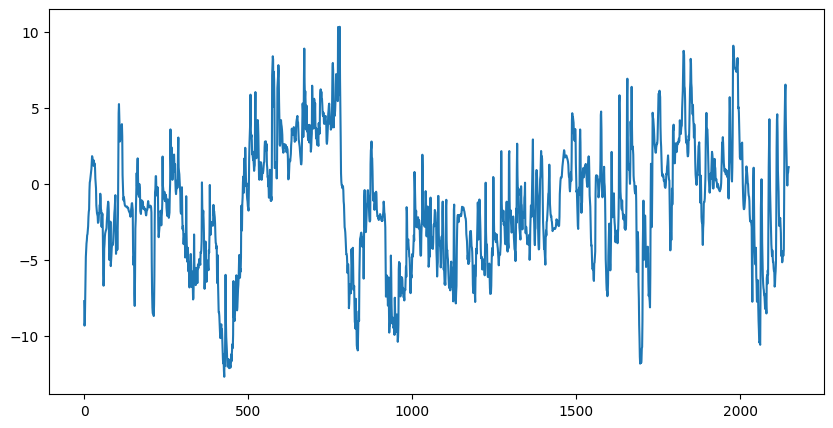

In [27]:
plt.figure(figsize = (10,5)) # set the size of the figure
plt.plot(df.temp) # scatter plot of the data

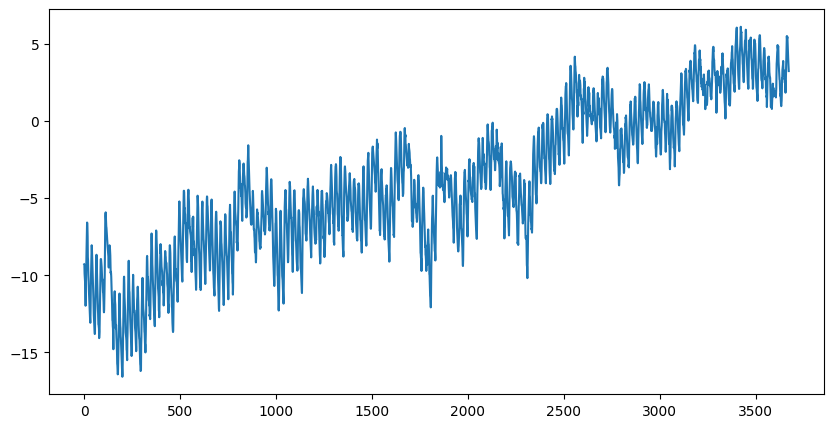

In [39]:
df = pd.read_csv('data/gangles21_aws.csv')

# Extract the temperature and humidity data variables for the year 2001
temperature = df['temp']
humidity = df['RH']


# Apply the wet bulb temperature calculation to the temperature and humidity data variables
df['wet_temperature'] = calculate_Tw(temperature, humidity)

plt.figure(figsize = (10,5)) # set the size of the figure
plt.plot(df.wet_temperature) # scatter plot of the data

In [40]:
df.head()

,time,temp,RH,wind,SW_global,ppt,press,wet_temperature
0,2021-01-18 00:00:00,-6.567,32.530,0.851,0.0,0,621.883,-9.285631
1,2021-01-18 01:00:00,-6.579,33.705,1.196,0.0,0,621.693,-9.302317
2,2021-01-18 02:00:00,-7.310,37.112,0.969,0.0,0,621.381,-9.892527
3,2021-01-18 03:00:00,-7.549,36.772,0.683,0.0,0,620.880,-10.081901
4,2021-01-18 04:00:00,-7.784,38.108,1.238,0.0,0,620.640,-10.275348
